# Math for ML: Basic Concepts

Before getting started on machine learning proper we need to get a few fundamental topics out of the way. To really understand machine learning, you need to know some math. Not a huge amount of math, but the basics of a few fundamental topics for sure. These include
1. Basic Concepts
2. Linear Algebra
3. Calculus and Optimization
4. Probability and Statistics

In the first part of this series on math for machine learning I'll focus just on topic (1), the most basic math concepts I think are important to know for starting with machine learning. These are things like numerical computation, elementary algebra, and functions, both univariate and multivariate functions. I'll also present the Greek alphabet since it's helpful to be able to read and write many of these letters in machine learning.

Let's get started.

## Numerical Computation

Let's start by talking a bit about numbers and how they're represented on computers. This may seem too basic to mention, but it's actually very important. There's a lot of subtlety involved. Recall that in python and most other languages there are several different *types* of numbers. The most important being integers (ints) and floating point numbers (floats).

### Integers

Integers are whole numbers that can be positive, negative, or zero. Examples are 5, 100151, 0, -72, etc. 

**Notation:** Math folks like to represent the "set" of integers by the "block Z" symbol, $\mathbb{Z}$. To say that "x is an integer" they like using the shorthand $x \in \mathbb{Z}$. The $\in$ symbol means "in" or "is an element of".

In python, ints are builtin objects of type `int` that more or less follow the rules that integers in math follow.

Among other things, the following operations can be performed with integers:
- Addition: $2 + 2 = 4$.
- Subtraction: $2 - 5 = -3$.
- Multiplication: $3 * 3 = 9$.
- Exponentiation: $2^3 = 2*2*2 = 8$ (in python this is the `**` operator, e.g. `2 ** 3 = 8`).
- Remainder (or Modulo): the remainder of 10 when divided by 3 is 1, written $10 \text{ mod } 3 = 1$ (in python this is the `%` operator, e.g. `10 % 3 = 1`).

If any of these operations are applied to two integers, the output will itself always be an integer.

Here are a few examples.

In [1]:
from utils import *

In [2]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
2 + 2
2 - 5
3 * 3
10 % 3
2 ** 3

4

-3

9

1

8

What about division? You can't always divide two integers and get another integer. What you have to do instead is called integer division. Here you divide the two numbers and then round the answer down to the nearest whole number. Since $5 \div 2 = 2.5$, the nearest rounded down integer is 2. 

In math, this "nearest rounded down integer" 2 is usually called the **floor** of 2.5, and represented with the funny symbol $\lfloor 2.5 \rfloor.$ Using this notation we can write the above integer division as 
$$\big\lfloor \frac{5}{2} \big\rfloor = 2.$$

In python, integer division is done using the `//` operator, e.g. `5 // 2 = 2`. Thus, I'll usually just write $5 \ // \ 2$ instead in this book,
$$5 \ // \ 2 = \big\lfloor \frac{5}{2} \big\rfloor = 2.$$
I personally like this notation better than $\lfloor \frac{5}{2} \rfloor$ since it's closer to python, and hence easier to translate to code.

In [4]:
5 // 2

2

We can also do regular division `/` with ints, but the output will *not* be an integer even if the answer should be, e.g. `4 / 2`. Only integer division is guaranteed to return an integer. We'll get to this shortly.

In [5]:
4 / 2
type(4 / 2)

2.0

float

In [6]:
4 // 2
type (4 // 2)

2

int

Division by zero is of course undefined for both division and integer division. In python it will always raise a `ZeroDivisionError` like so.

In [7]:
4 / 0

ZeroDivisionError: division by zero

In [8]:
4 // 0

ZeroDivisionError: integer division or modulo by zero

#### Representing Ints

Just like every other data type, on a computer integers are *actually* represented internally as a sequence of bits. The number of bits used to represent the integer is called its *word size*. In python the typical word size is 64 bits.


**Aside:** Since there are $2^{64}$ possible numbers in 64 bits, python *should* only be able to represent $2^{64}$ integers. Assuming integers can be negative, that would mean only integers in the range $[-2^{63}+1, 2^{63}-1]$ should be valid, i.e. only the integers $-2^{63}+1, -2^{63}+2, \cdots, -1, 0, 1, \cdots, 2^{63}-2, 2^{63}-1$. This is essentially true in older versions of pythons as well as most older programming languages like C or C++. But it turns out newer versions of python have tricks that allow you to represent essentially arbitrarily large and integers.

In [9]:
2 ** 63 - 1 # should be the max integer allowed
2 ** 100 # but this much bigger number is represented just fine!

9223372036854775807

1267650600228229401496703205376

This interesting fact aside, integers are represented in bits more or less by their binary representation. For example, since the number 6 is `110` in binary, it would be represented in 63 bits with 63-3=60 bits of zeros followed by `110`. We'd also need to include a sign bit at the beginning to indicate we mean +6 and not -6. Our representation for the integer 6 thus might look something like this:
```
0    000000000000000000000000000000000000000000000000000000000000    110
sign bit (0=+, 1=-)      60 leading zeros                 6 in binary is 110
```

**Aside:** In real life integers are usually represented on a computer using what's called the *two's complement* representation. It's very similar to what I just described, except it handles negative numbers slightly differently by flipping the bits at the end and adding 1. There are advantages to doing it this way, but in my opinion this isn't worth dwelling on in this book.

**Aside:** Rather than waste valuable time trying to teach you (or remind you) how to convert numbers to binary and back by hand, I'll just mention that we can easily get the binary representation of an integer in python by using the `bin` function. The `bin` function returns the binary representation of an int as a string beginning with `0b`. To go back to the decimal form just use `int` on the binary string.

In [10]:
bin(6)

'0b110'

In [11]:
int(0b110)

6

Different word sizes for integers are sometimes useful in machine learning. Usually we care about *smaller* word sizes, not larger ones. For example, a popular choice in recent years is to use 8-bit integers to encode the parameters of a neural network in a lookup table. This is called model quantization, and is used to make the model take up much less disk space than it otherwise would. We'll see this when we get to deep learning.

### Floats

What if we want decimal numbers or fractions instead of whole numbers, like 1.2 or 0.99999 or 3.1415926 or 1/2? To do this we need a new system of numbers called floating point numbers, or **floats**. Floats are an attempt to represent what in math are called **real numbers**. As we'll see, floats can't represent all real numbers *exactly* because they can't express numbers with arbitrary many digits. Nevertheless, they're a reasonably good approximation to the idea of the real number line.

**Notation:** Math folks like to express the set of real numbers using the "block R" symbol $\mathbb{R}$, and write "x is a real number" as $x \in \mathbb{R}$.

In python, floats are builtin objects of type `float`. They approximate real numbers with a given degree of precision (we'll get to this shortly).

Floats obey pretty much the same operations that integers do with some minor exceptions:
- Addition: $1.2 + 4.3 = 5.5$.
- Subtraction: $1.2 - 4.3 = -3.1$.
- Multiplication: $1.2 * 4.3 = 5.16$.
- Exponentiation: $4.3^2 = 18.49$.
- Remainder (or Modulo): $4.3 \text{ mod } 1.2 = 0.7$.
- Integer Division: $4.3 \ // \ 1.2 = 3.0$.
- Division: $4.3 \div 1.2$.

Let's print these out in python and verify the answers are correct.

In [12]:
1.2 + 4.3
1.2 - 4.3
1.2 * 4.3
4.3 ** 2
4.3 % 1.2
4.3 // 1.2
4.3 / 1.2

5.5

-3.0999999999999996

5.159999999999999

18.49

0.7

3.0

3.5833333333333335

Most of them look right. But what the heck is going on with `1.2 - 4.3` and `1.2 * 4.3`? We're getting these weird trailing 9s. That gets to how floats are represented on your computer.

#### Representing Floats

So how are floats represented on a computer? By default, python uses what's called **double precision** for floats, which means 64 bits are used to represent a float. This is just like with ints, except there's a major difference in how the number is represented. While ints are represented via their binary sequence, floats are represented in multiple pieces.

Generally speaking, a floating point number $x$ can be expressed in the form
$$x = (-1)^{\text{sign}} \cdot 2^{\text{exponent}-\text{bias}} \cdot \text{precision},$$
where $\text{sign}$ is the **sign bit** (which can be 0 or 1), while $\text{exponent}$ and $\text{precision}$ are values that each take up some number of bits depending on the floating point precision. The **exponent** determines what *power* to raise the float to, which affects the *range* of values the system can take on. The **precision** (or **significand**) determines the actual digits of precision you see. It's the bits used to represent the decimal places in the number essentially. There is also a fixed term called a **bias**, which is meant to center the exponent around a suitable range of values and control the amount of precision to show around zero.

In the double precision (64-bit) floating point convention,
- 1 bit is used to represent the **sign**, 
- 11 bits to represent the **exponent**,
- the remaining 52 bits are used to represent the **precision**, and
- the **bias** is taken to be $1023=2^{10}-1$.

On top of all these floats, a few of them are also reserved for special values like positive and negative infinity, positive and negative zero (yes that's a thing), and the "not-a-number" or NaN.

Some consequence of this representation are:
- They can only represent values in the range of about $-10^{308}, \cdots, 10^{308}$.
- They can only express up to about $16$ decimal digits of precision. 
- For numbers around 0, the smallest possible numbers they can represent are about $\pm 10^{-308}$.
- For larger numbers, the difference between any two numbers is at least $10^{-16}$, called **machine epsilon**.
- Any number that does not fall into this range either gets truncated to the nearest float or mapped to a special number like zero or infinity.

Even still, $-10^{308}, \cdots, 10^{308}$ is a pretty huge range when you think about it. It works just fine for most applications, but there are weird corner cases that come up from time to time that we have to deal with.

For example, what happens if we try to express the constant $\pi$ to its first [100 digits](https://www.wolframalpha.com/input?i=pi+to+100+digits) as a double precision float? It just gets truncated to its first 15 digits. Double precision is unable to keep track of the other 85 digits. They just get lost.

In [13]:
pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
pi

3.141592653589793

Another implication of the way floats are defined is that they are not equally spaced. That is, two nearby *small* floats are closer together than two nearby *large* floats. This seems kind of weird, but it's all due to the way the exponents are represented, which makes the smaller numbers have higher precision than larger numbers. Smaller exponents mean that the numbers are closer together, while larger exponents mean that the numbers are further apart.

Let's try to visualize this in a plot so it's easier to grasp. To do so, I'll look at the much simpler system of 8-bit floating point. I'll use 3 bits for the precision, 4 for the exponent, and 1 for the sign. I'll also use a bias of 10. 

I'll generate all possible 8-bit floats using the helper function `gen_all_floats`, passing in the number of precision bits `n_precision=3`, the number of exponent bits `n_exp=4`, and the a bias `bias=10`

Let's also print out some statistics to see some properties of this 8-bit floating point system. I'll look at how many numbers there are, the most negative float, the most positive float, the smallest non-zero float, and machine epsilon (the smallest float greater than 1). 

When a number gets larger than the most positive (or negative) float, in this case 56, it's said to **overflow**. Any number larger than this will overflow to infinity (or negative infinity). When a number gets smaller than the the smallest nonzero number, in this case 0.001953125, it's said to **underflow**. Any number smaller than this will truncate down to zero (or negative zero). Overflow and underflow errors are some of the most common numerical bugs that occur in deep learning, and usually result from not handling floats correctly.

In [14]:
x = gen_all_floats(n_precision=3, n_exp=4, bias=10)
print(f'Total number of 8-bit floats: {len(x)}')
print(f'Most negative float: {min(x)}')
print(f'Most positive float: {max(x)}')
print(f'Smallest nonzero float: {min([val for val in x if val > 0])}')
print(f'Machine Epsilon: {min([val for val in x if val > 1])}')

Total number of 8-bit floats: 120
Most negative float: -56.0
Most positive float: 56.0
Smallest nonzero float: 0.001953125
Machine Epsilon: 1.25


With these numbers in hand let's now plot their distribution on the number line using the helper function `plot_float_dist` function.

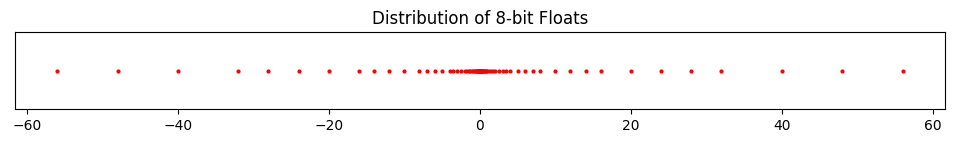

In [15]:
plot_float_dist(x, title='Distribution of 8-bit Floats')

Remember, I'm plotting *all* possible 8-bit floating point values here. What I want you to observe is that we can't even represent all possible numbers in the range $-56, \cdots, 56$. In fact, not even most of them. For example, the numbers in $-10, \cdots, 10$ are getting represented *much* more than the ones from $-56, \cdots, -10$ or $10, \cdots, 56$. The numbers around $0$ are much closer to each other than the numbers around $\pm 56$.

Feel free to play around with these two functions and see how the distribution of floats changes for different choices of `n_precision`, `n_exp`, and `bias`. Be careful not to make `n_exp` too large though or you may crash the kernel.

**Note:** The representation above neglects to add in the special floating point characters, which include things like positive and negative infinity and positive and negative zero (yes that's a thing). Our system is thus missing a small handful of important numbers. Typically these are added into the floating point system by using the last bits of the precision or exponent to represent them specially.

This same fact is true for double precision numbers, except there are a lot more of them. They can represent a lot more numbers, but they still have gaps. Numbers close to $0$ are much closer together than the ones near the endpoints at around $\pm 10^{308}$.

One practical example where this non-equal spacing issue can become something to worry about is when subtracting two floats of vastly different sizes. For example, the number $10^{100}-1$, written `1e100 - 1` in python, doesn't even exist in double precision. We just get `1e100`. That is, python thinks $10^{100}-1 = 10^{100}$. However, for a much smaller number like $1000$, $1000-1=999$ works just fine.

In [16]:
1e100 - 1
1000 - 1

1e+100

999

There is also a minimum number greater than zero. In double precision, that number is $2^{-1022}$, or about $2 \cdot 10^{-308}$. In practice, python seems to stop at around $10^{-323}$ as we can see below. This arises from the fact that python also uses something called **subnormal numbers**, which is an extra trick on top of the floating point format to get better precision around zero. It doesn't change anything we've discussed, it just creates more really small numbers close to zero.

In [17]:
1e-323
1e-324

1e-323

0.0

These issues explain why we got the weird results above when subtracting `1.2 - 4.3`. The imperfect precision in the two numbers resulted in a numerical roundoff error, leading in the trailing 9s that should've rounded up to -3.1 exactly.

In [18]:
1.2 - 4.3

-3.0999999999999996

Floating point numbers also define 3 special values that aren't real numbers: positive infinity $\infty$, negative infinity $-\infty$, and "not a number" $\text{NaN}$. The infinity values are used to represent values too large to fit in memory, and NaN values show up when a number is undefined. For example, $\infty - \infty = \text{NaN}$ is undefined.

In base python these numbers are represented as `float('inf')`, `float('-inf')`, `float('nan')`, and respectively.

These 3 special "numbers" show up all the time in machine learning, usually due to some kind of problem during training or some issue with the data, as we'll later see.

In [19]:
float('inf')
float('-inf')
float('nan')

inf

-inf

nan

In [20]:
float('inf') + float('-inf') # infinity - infinity = NaN

nan

Working with floating point numbers can sometimes be subtle. As we go, we'll see some cases where we have to treat them differently than we might treat numbers on a piece of paper. Rather than exhaustively cover all of those cases now it makes more sense in my opinion to introduce them as we need them, so I'll hold off for now.

There are also other formats for for representing real numbers as well, some not even floating-point based. It turns out there are ways to represent real numbers using *fixed point* numbers instead. In fixed-point systems, numbers are represented in bits by using a certain number for the integer part (left of the decimal), and a certain number for the fractional part (after the decimal). No special attempt is made to represent the exponent. While this allows for a more evenly spaced grid of numbers, it also means you can't represent as wide a range of numbers for a given number of bits. For this reason, fixed point systems usually are not widely used.

As far as other floating point representations, while double precision is the python standard, there are other types of precision as well. For example, **single precision** uses 32 bits to represent a real number, while **half precision** uses 16 bits. These floating point formats are less precise than double precision since they can't represent as many numbers, but they do have their uses, as we'll see when we get to deep learning.

#### Common Floating Point Pitfalls

To cap this long section on floats, here's a list of common pitfalls people run into when working with floating point numbers, and some ways to avoid each one. This is probably the most important thing to take away from this section. You may find it helpful to reference later on. See this [post](https://www.codeproject.com/Articles/29637/Five-Tips-for-Floating-Point-Programming) for more information.

1. Numerical overflow: Letting a number blow up to infinity (or negative infinity)
    - Clip numbers from above to keep them from being too large
    - Work with the log of the number instead
    - Make sure you're not dividing by zero or a really small number
    - Normalize numbers so they're all on the same scale
2. Numerical underflow: Letting a number spiral down to zero (or negative zero)
    - Clip numbers from below to keep them from being too small
    - Work with the exp of the number instead
    - Normalize numbers so they're all on the same scale
3. Subtracting floats: Avoid subtracting two numbers that are approximately equal
    - Reorder operations so approximately equal numbers aren't nearby to each other
    - Use some algebraic manipulation to recast the problem into a different form
    - Avoid differencing squares (e.g. when calculating the standard deviation)
4. Testing for equality: Trying to test exact equality of two floats
    - Instead of testing `x == y`, test for approximate equality with something like `abs(x - y) <= 1e-5`
    - Use the `np.allclose(x, y)` or `torch.allclose(x, y)` functions, which will do this for you
5. Unstable functions: Defining some functions in the naive way instead of in a stable way
    - Examples: factorials, softmax, logsumexp
    - Use a more stable library implementation of these functions
    - Look for the same function but in log form, e.g. `log_factorial` or `log_softmax`
6. Beware of NaNs: Once a number becomes NaN it'll always be a NaN from then on
    - Prevent underflow and overflow
    - Remove missing values or replace them with finite values

## Elementary Algebra

It's useful in machine learning to be able to read and manipulate basic algebraic equations, especially when reading the research literature or when trying to learn how the various algorithms work. I won't go into depth on the basics of high school algebra. Sorry but I have to assume *some* mathematical maturity of the reader, and this seems like a good place to draw the line.

You should be able to take an equation like $ax + b = c$ and solve it for $x$ in terms of coefficients $a, b, c$,
$$
\begin{align}
ax + b &= c \\
ax &= c - b \\
x &= \frac{c - b}{a}.
\end{align}
$$

You should also be able to expand simple equations like $(ax+b)^2=c$,
$$
\begin{align}
(ax + b)^2 &= c \\
(ax + b)(ax+b) &= c \\
(ax)^2 + (ax)b + b(ax) + b^2 &= c \\
a^2x^2 + abx + abx + b^2 &= c \\
a^2x^2 + 2abx + (b^2 - c) &= 0.
\end{align}
$$

That's pretty much it. Just simple variable manipulation like this. You don't really need the quadratic formula or the Fundamental Theorem of Algebra or anything like that.

## Univariate Functions

Recall that a function is a thing that maps inputs to outputs. A function $f(x)$ is a mapping that takes in a value $x$ and maps it to a unique value $y=f(x)$. These values can be either single numbers (called **scalars**), or multiple numbers (vectors or tensors). When $x$ and $y$ are scalars, $f(x)$ is called a **univariate function** or **scalar-valued function**. In this case, we can plot $x$ vs $y$ in the usual way, with $x$ on the horizontal axis and $y$ on the vertical axis.

Let's quickly cover some of the useful functions to remember that show up in machine learning. We'll see other functions later that you probably haven't seen before, but for now we'll focus on the ones covered in most math courses.

### Affine Functions

The most basic functions to be aware of are constant functions, linear functions, and affine functions. These kinds of functions show up all over the place in machine learning in either univariate or multivariate forms. Some examples of each of these are:
- Constant functions: $y=2$, $x=1$
- Linear functions: $y=-x$, $y=5x$
- Affine functions: $y=-x+1$, $y=5x-4$

All constant functions are affine functions, and all linear functions are affine functions. Note that what we call an affine function here is unfortunately called a linear function in elementary math classes, subsuming what we call a linear function as a special case with no added constant. This is unfortunate, but strictly speaking affine functions are defined as shifted linear functions (a constant is added), while linear functions *always* pass through the origin (no added constant).

I want to plot these functions, but before I do let me load in some useful libraries we'll need. Even though I'll cover `numpy` and `matplotlib` in more depth later on I'll mention a few things. 

Numpy is the standard python library for working with numerical arrays. It's much easier to work with usually, has lots of useful functions, and is generally much faster than the equivalent python code would be. Typically numpy is aliased to the simpler `np` name. Its functions all usually look like `np.something`.

Matplotlib is the standard plotting library in python. There's a lot in it, but we usually won't use that much. Almost all the time we'll be working with the `pyplot` submodule, which we alias to `plt` by convention. Most plotting commands look like `plt.something`.

Now, with these out of the way, below I'm going to use a helper function called `plot_function` to assist with creating nice plots. Just focus on the shape of the curves, particularly how fast they grow with $x$.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

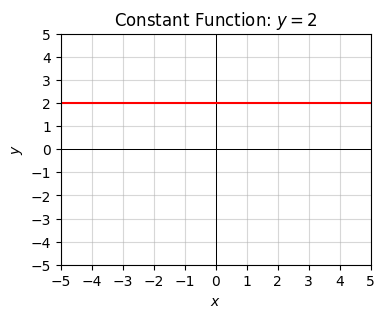

In [22]:
x = np.arange(-10, 10, 0.1)
y = 2*np.ones(len(x))
plot_function(x, y, (-5, 5), title='Constant Function: $y=2$')

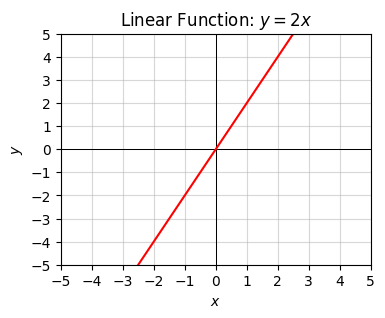

In [23]:
x = np.arange(-10, 10, 0.1)
y = 2 * x
plot_function(x, y, (-5, 5), title='Linear Function: $y=2x$')

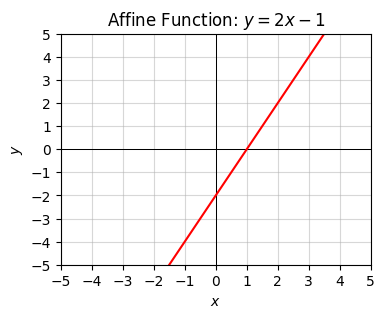

In [24]:
x = np.arange(-10, 10, 0.1)
y = 2 * x - 2
plot_function(x, y, (-5, 5), title='Affine Function: $y=2x-1$')

### Polynomial Functions

Polynomial functions are just sums of powers of $x$, e.g. something like $y=3x^2+5x+1$ or $y=x^{10}-x^{3}+4$. These functions tend to look like lines, bowls, or roller coasters that turn up and down some number of times. 

A major example is the quadratic function $y=x^2$, which is just an upward-shaped bowl. Its bowl-shaped curve is called a **parabola**. We can get a downward-shaped bowl by flipping the sign to $y=-x^2$. Probably the most important place quadratic functions show up in machine learning is in the mean squared error loss function.

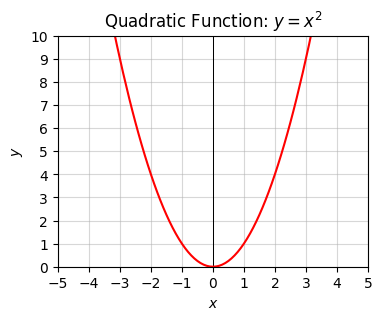

In [25]:
x = np.arange(-10, 10, 0.1)
y = x ** 2
plot_function(x, y, (-5, 5), (0, 10), title='Quadratic Function: $y=x^2$')

### Rational Functions

Rational functions are functions that are ratios of polynomial functions. Examples might be $y=\frac{1}{x}$, or $$y=\frac{x^3+x+1}{x^2-1}.$$
These functions typically look kind of like polynomial functions, but have points where the curves blow up to infinity. The points where the function blows up are called poles or asymptotes.

Here's a plot of
$$y=\frac{x^3+x+1}{x^2-1}.$$
Notice how weird it looks. There are asymptotes where the function blows up at $\pm 1$, which is where the denominator $x^2-1=0$.

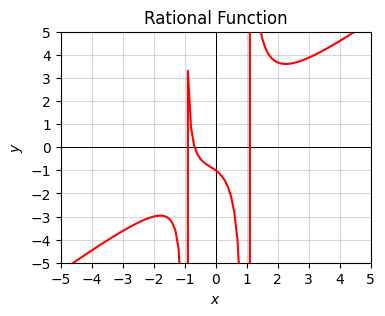

In [26]:
x = np.arange(-10, 10, 0.1)
y = (x ** 3 + x + 1) / (x ** 2 - 1)
plot_function(x, y, (-5, 5), (-5, 5), title='Rational Function')

Here's a plot of $y=\frac{1}{x}$. There's an asymptote at $x=0$. When $x > 0$ it starts at $+\infty$ and tapers down to $0$ as $x$ gets large. When $x < 0$ it does the same thing, except flipped across the origin $x=y=0$. This is an example of an odd function, a function that looks like $f(x)=-f(x)$, which is clear in this case since $1/(-x)=-1/x$.

A related function is $y=\frac{1}{|x|}$. The difference here is that $|x|$ can never be negative. This means $f(x)=f(-x)$. This is called an even function. Functions like this are symmetric across the y-axis.

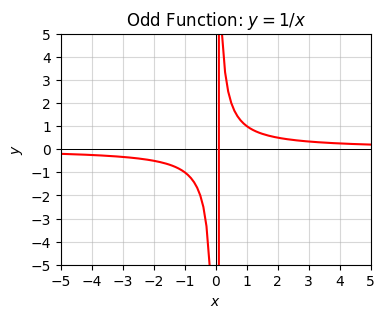

In [27]:
x = np.arange(-10, 10, 0.1)
y = 1 / x
plot_function(x, y, (-5, 5), (-5, 5), title='Odd Function: $y=1/x$')

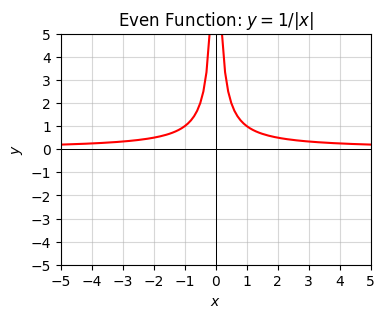

In [28]:
x = np.arange(-10, 10, 0.1)
y = 1 / np.abs(x)
plot_function(x, y, (-5, 5), (-5, 5), title='Even Function: $y=1/|x|$')

### Power Law Functions

Functions that look like $y=\frac{1}{x^n}$ for some $n$ have a special form. These are sometimes called inverse, hyperbolic, or power law functions. These can be represented more easily by using a negative power like $y=x^{-n}$, which means the exact same thing as $y=\frac{1}{x^n}$.

We can extend $n$ to deal with things like square roots or cube roots or any kind of root as well by allowing $n$ to be non-integer. For example, we can represent the square root function $y=\sqrt{x}$ as $y=x^{1/2}$, and the cube root $y=\sqrt[3]{x}$ as $y=x^{1/3}$.

Here's a plot of what the square root function looks like. Here $y$ grows slower than a linear function, but still grows arbitrarily large with $x$.

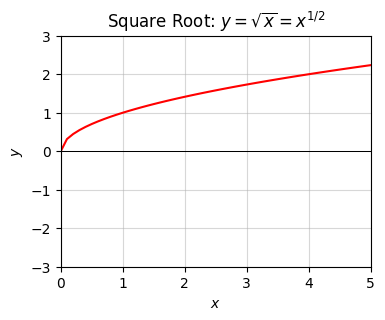

In [29]:
x = np.arange(0, 10, 0.1)
y = np.sqrt(x)
plot_function(x, y, (0, 5), (-3, 3), title='Square Root: $y=\sqrt{x}=x^{1/2}$')

### Exponentials and Logarithms

Two very important functions are the exponential function $y=e^x$ and the logarithm function $y=\log(x)$. The value $e \approx 2.71828$ is called Euler's number, an irrational number (i.e. you can't represent it exactly as a fraction of two integers).

The exponential function is a function that blows up very, very quickly. The logarithm function grows very, very slowly (much more slowly than the square root does).

Here are some plots of what the exponential and logarithm functions look like. Note that the logarithm function is only defined for positive-valued numbers $x \geq 0$, with $\log(0)=-\infty$. This is the dual of the exponential function only taking on $y \geq 0$.

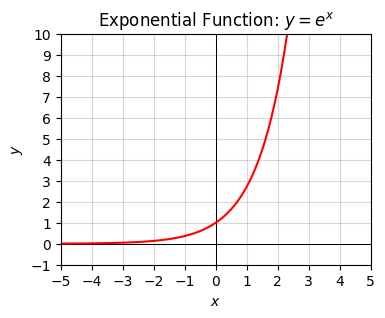

In [30]:
x = np.arange(-5, 5, 0.1)
y = np.exp(x)
plot_function(x, y, (-5, 5), (-1, 10), title='Exponential Function: $y=e^x$')

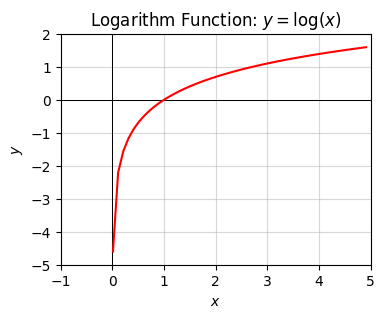

In [31]:
x = np.arange(0.01, 5, 0.1)
y = np.log(x)
plot_function(x, y, (-1, 5), (-5, 2), title='Logarithm Function: $y=\log(x)$')

The logarithm is the inverse of the exponential function (i.e. it "undoes" the exponential operation). Similarly the exponential function is the inverse of the logarithm function. In each case, applying one after the other just gives you the same thing back that we had before:
$$ \log(e^x) = e^{\log(x)} = x.$$

Note that the logarithm has different bases. Most commonly we care about the "natural" base defined above, sometimes written $\ln(x)$ instead. There are also other bases that sometimes show up as well, like the base-2 logarithm $\log_{2}(x)$, which is the inverse of $2^x$, and the base-10 logarithm $\log_{10}(x)$, which is the inverse of $10^x$.

Exponentials obey the following laws:
$$e^0 = 1,$$
$$e^{a+b} = e^a e^b,$$
$$e^{a-b} = \frac{e^a}{e^b},$$
$$e^{ab} = (e^a)^b,$$
$$a^b = e^{b \log(a)}.$$

While logarithms obey their own similar laws:
$$\log(1) = 0,$$
$$\log(e) = 1,$$
$$\log(ab) = \log(a) + \log(b),$$
$$\log\big(\frac{a}{b}\big) = \log(a) - \log(b),$$
$$\log(a^b) = b\log(a),$$
$$\log_a(x) = \frac{\log(x)}{\log(a)}.$$

Here's an example of an equation involving exponentials and logarithms that you should be able to quickly solve. Suppose you have $n$ bits of numbers (perhaps it's the precision in some float) and you want to know how many *digits* this number takes up in decimal form (what you're used to). This would be equivalent to solving the following equation for $x$, which we can do with exponents and logs.
$$
\begin{align}
2^n &= 10^{x}, \\
\log(2^n) &= \log(10^{x}), \\
n\log(2) &= x\log(10), \\
x &= n \frac{\log(2)}{\log(10)}.
\end{align}
$$

For example, you can use this formula to show that 52 bits of precision translate to about 15 to 16 digits of precision. I'll show how to do this using the numpy `np.log` function, which calculates the (base-$e$) log of a number.

In [32]:
n = 52
x = n * np.log(2) / np.log(10)
x

15.65355977452702

### Trigonometric Functions

The last two textbook functions I'll remind you of are the two trig functions sine $\sin(x)$ and cosine $\cos(x)$. These won't come up very much in ML though so you don't need to know that much other than what their plots look like, which are just waves. Note that the cosine is just a sine function that's shifted right by $\frac{\pi}{2} \approx 1.57$.

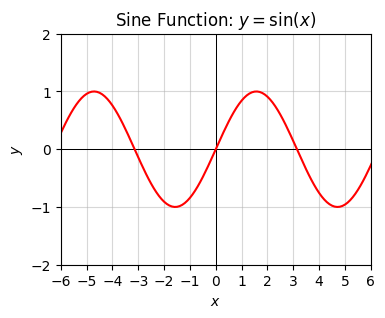

In [33]:
x = np.arange(-10, 10, 0.1)
y = np.sin(x)
plot_function(x, y, (-6, 6), (-2, 2),  title='Sine Function: $y=\sin(x)$')

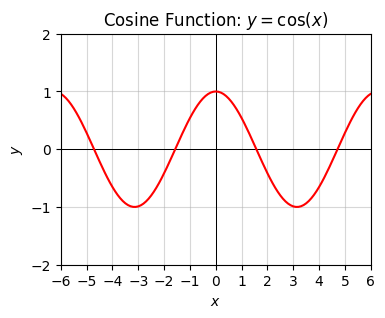

In [34]:
x = np.arange(-10, 10, 0.1)
y = np.cos(x)
plot_function(x, y, (-6, 6), (-2, 2), title='Cosine Function: $y=\cos(x)$')

### Compositional Functions

We can also of course have any arbitrary hybrid of the above functions. We can apply exponentials to affine functions, logs to sine functions, sines to exponential functions. In essence, this kind of layered composition of functions is what a neural network is as we'll see later on.

A mathematician might write an abstract compositional function as a function applied to another function, like $y=f(g(x))$ or $y=(f \circ g)(x)$. These can be chained arbitrarily many times, not just two.

Consider, for example, the function composition done by applying the following functions in sequence:
- an affine function $y=wx+b$
- followed by a linear function $y=-x$
- followed by an exponential function $y=e^x$
- followed by a rational function $y=\frac{1}{x}$

to get the full function
$$y = \frac{1}{1 + e^{-(wx+b)}}.$$

Here's a plot of what this function looks like for the "standard" sigmoid where $w=1, b=0$. Notice that $0 \leq y \leq 1$. The values of $x$ get "squashed" to values between 0 and 1 after a sigmoid is applied.

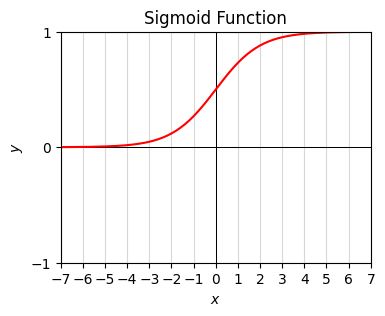

In [35]:
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))
plot_function(x, y, (-7, 7), (-1, 1), title='Sigmoid Function')

This function is called the **sigmoid** function, and is very important in machine learning since it in essence creates probabilities. We'll see it a lot more. The standard form is usually written $\sigma(x)$, i.e. $$\sigma(x) = \frac{1}{1 + e^{-x}}.$$
Arbitrary affine transformations of the standard form would then be written as $\sigma(wx+b)$.

Another similar looking function shows up sometimes in machine learning. It's called the **hyperbolic tangent** or **tanh** function, (when $w=1,b=0$) has the form
$$y = \frac{e^x - e^{-x}}{e^x + e^{-x}}.$$

The tanh function, called that because it's usually written as $\tanh(x)$, looks pretty much the same as the sigmoid, except it's scaled vertically so that $-1 \leq y \leq 1$.

Here's a plot of the tanh function. Notice how similar it looks to the sigmoid with the exception of the scale of the y-axis.

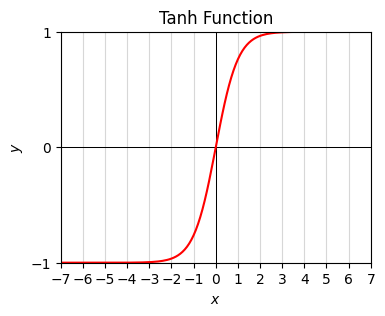

In [36]:
x = np.arange(-10, 10, 0.1)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plot_function(x, y, (-7, 7), (-1, 1), title='Tanh Function')

## Multivariate Functions

What we've covered thus far only deals with univariate functions, functions where $y=f(x)$, but $x$ and $y$ are just single numbers, i.e. scalars. In machine learning we're almost always dealing with multivariate functions with *lots* of variables, sometimes billions of them. It turns out that most of what I've covered so far extends straight forwardly to multivariate functions with some small caveats, which I'll cover below.

Simply put, a multivariate function is a function of multiple variables. Instead of a single $x$, we might have a bunch of variables, like $x, y, z, a, b, c$ or whatever:
$$f(x, y, z, a, b, c).$$
If you think of a multivariate function like a python function this shouldn't be surprising. Functions can and do usually take multiple arguments. 

Here's an example of a function that takes two arguments $x$ and $y$ and produces a single output $z$, more often written as $z=f(x,y)$. The function we'll look at is $z = x^2 + y^2$. I'll evaluate the function at three points:
- $x=0$, $y=0$,
- $x=1$, $y=-1$,
- $x=0$, $y=1$.

The main thing to notice is the function does exactly what you think it does. You plug in 2 values, and you get out 1 value that's just the sum of squares of those two. Not rocket science.

In [37]:
f = lambda x, y: x ** 2 + y ** 2
f(0, 0), f(1, -1), f(0, 1)

(0, 2, 1)

We can also have functions that map multiple inputs to multiple outputs. Suppose we have a function that takes in 2 values $x, y$ and outputs 2 values $a, b$. We'd write this as $(a,b) = f(x,y)$. Let's try the example of
$$(a, b) = f(x,y) = (x+y, x-y).$$
This is really just two functions, both functions of $x$ and $y$. That is, we can completely equivalently write this function as
$$a = f_1(x, y) = x + y,$$
$$b = f_2(x, y) = x - y.$$
Let's evaluate it at the point $x=1$, $y=1$. Again, looks pretty intuitive.

In [38]:
f = lambda x, y: (x + y, x - y)
f(1, 1)

(2, 0)

For now I'll just focus on the case of multiple inputs, single output like the first example. These are usually called **scalar-valued functions**. The case of multiple outputs is usually called **vector-valued functions**. Using multiple outputs starts to get into the realm of linear algebra, which I'll touch on in a future lesson.

A scalar-valued function of $n$ variables $x_1, x_2, \cdots, x_n$ has the form
$$y = f(x_1, x_2, \cdots, x_n).$$
Note $n$ can be as large as we want it to be. When working with deep neural networks (which are just multivariate functions of a certain form) $n$ can be huge. For example, if the input is a $256 \times 256$ image, the input might be $256^2=65536$ pixels. For a 10 second audio clip that's sampled at 44 kHz, the input might be $10*44k=440k$ amplitudes. Large numbers indeed.

Calculating the output of multivariate functions is just as straight-forward as for univariate functions pretty much. Unfortunately, visualizing them is much harder. The human eye can't see 65536 dimensions, only 3 dimensions. This in some sense means we need to give up on the ability to "graph" a function and instead find other ways to visualize it.

One thing that sometimes help to visualize high dimension functions is to pretend they're functions of two variables, like $z=f(x,y)$. In this special case we can visualize the inputs as an xy-plane, and the output as a third axis sticking out perpendicular to the xy-plane from the origin. Each $x,y$ pair will map to one unique $z$ value. Done this way, we won't get a graph of a *curve* as before, but a *surface*.

Here's an example of what this might look like for the simple function $z=x^2+y^2$. I'll plot the function on the domain $-10 \leq x \leq 10$ and $-10 \leq y \leq 10$. I have a helper function `plot_3d` that I'll use to do this. It takes in two lists of values `x` and `y`. I'll use `np.linspace` to sample 100 points from -10 to 10 for each. Then I'll define a lambda function that maps `x` and `y` to the output `z`. Passing these three arguments into the helper function gives us our 3D plot.

In [39]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f = lambda x, y: x**2 + y**2

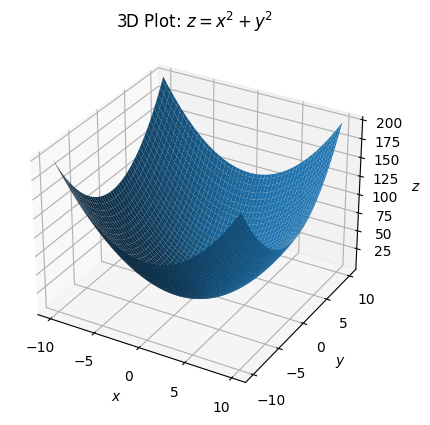

In [40]:
plot_3d(x, y, f, title='3D Plot: $z=x^2+y^2$')

Notice how the plot looks like an upward facing bowl. Imagine a bowl lying on a table. The table is the xy-plane. The bowl is the surface $z=x^2+y^2$ we're plotting. While the plot shows the general idea what's going on, 3D plots can often be difficult to look at. They're often slanted at funny angles and hide important details.

Another way we can plot a function like $z=f(x,y)$ is this: Rather than create a third axis for $z$, we'll plot it directly on the xy-plane as a 2D plot. But since we have a surface, not a curve, we have to do this for lots of different $z$ values. For example, we might plot all of the following curves, setting $z$ to some constant value each time:
$$
\begin{align}
25 &= x^2 + y^2, \\
50 &= x^2 + y^2, \\
75 &= x^2 + y^2, \\
100 &= x^2 + y^2, \\
125 &= x^2 + y^2, \\
150 &= x^2 + y^2.
\end{align}
$$
Doing this will give a family of curves on one 2D plot, each curve representing some value of $z$. In our example here, these curves are all circles of radius $z^2$.

These kinds of plots are called **contour plots**. Visually, you can think of a contour plot as kind of like a topographical map. You're looking down on a map of some place with valleys, hills, mountains, whatever. How can the map accurate represent the elevation of these features? One way is to draw curves of constant elevation for lots of different choices of elevations. This will give something that gives a good 3D indication of the terrain around you.

Here is a contour plot for our function $z=x^2+y^2$. I'll use the helper function `plot_contour`, again passing in the same three arguments as above.

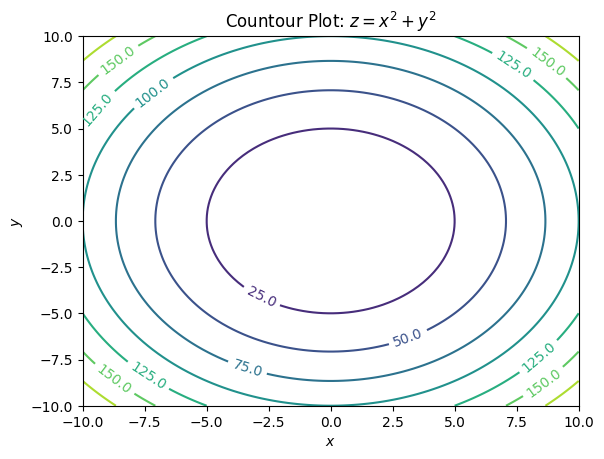

In [41]:
plot_countour(x, y, f, title='Countour Plot: $z=x^2+y^2$')

Notice how we get a bunch of concentric rings in the contour plot, each labeled by some value (their $z$ values). These rings correspond to the circles I was talking about. You can visually imagine this plot as looking down from the top of the bowl. In the middle you see the bottom. The rings get closer together the further out you go, which indicates that the bowl is sloping steeper the further out we get.

We'll see more examples of multivariate functions in the coming lessons, as they're used to mathematically define the form of many machine learning algorithms.

## Appendix: Greek Alphabet

Like many other technical fields, machine learning makes heavy use of the Greek alphabet to represent variable names in mathematical equations. While not all Greek characters are used, certain ones are worth being aware of. Below is a [table](https://howtosaymathematics.files.wordpress.com/2011/08/greek-alphabet2.pdf) of the Greek letters upper and lower case, as well as a guide on how to pronounce and write them.

You don't need to memorize all of these letters, but any time you see one in a future lesson you should come back to the table below and try to memorize the name of the letter and how it's pronounced. It's also worth taking some time to learn how to write the letters you see come up so you can write the equations down yourself and manipulate them.

<img src="../resources/greek.png" width=550>